## Problem Statment: 
### Sales management has gained importance to meet increasing competition and the need for improved methods of distribution to reduce cost and to increase profits. Sales management today is the most important function in a commercial and business enterprise.

### Importing necessary libraries

In [2]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

/Users/manjeetkour/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


### Loading the dataset into dataframe

In [3]:
df=pd.read_csv("Amazon Sales data.csv")
df

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Sub-Saharan Africa,Mali,Clothes,Online,M,7/26/2011,512878119,9/3/2011,888,109.28,35.84,97040.64,31825.92,65214.72
96,Asia,Malaysia,Fruits,Offline,L,11/11/2011,810711038,12/28/2011,6267,9.33,6.92,58471.11,43367.64,15103.47
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,6/1/2016,728815257,6/29/2016,1485,154.06,90.93,228779.10,135031.05,93748.05
98,North America,Mexico,Personal Care,Offline,M,7/30/2015,559427106,8/8/2015,5767,81.73,56.67,471336.91,326815.89,144521.02


### Check the datatypes and transforming which doesnt suit the business needs

In [19]:
df.dtypes

Region             object
Country            object
Item Type          object
Sales Channel      object
Order Priority     object
Order Date         object
Order ID            int64
Ship Date          object
Units Sold          int64
Unit Price        float64
Unit Cost         float64
Total Revenue     float64
Total Cost        float64
Total Profit      float64
dtype: object

In [4]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [5]:
df.dtypes

Region                    object
Country                   object
Item Type                 object
Sales Channel             object
Order Priority            object
Order Date        datetime64[ns]
Order ID                   int64
Ship Date         datetime64[ns]
Units Sold                 int64
Unit Price               float64
Unit Cost                float64
Total Revenue            float64
Total Cost               float64
Total Profit             float64
dtype: object

### Handling duplicate and missing values

In [4]:
num_duplicates = df.duplicated().sum()
print("Number of Duplicate Rows:", num_duplicates)
total_missing_values = df.isna().sum().sum() 
print("Total Missing Values:", total_missing_values)

Number of Duplicate Rows: 0
Total Missing Values: 0


## Data Analysis

### Monthly trend of sales 

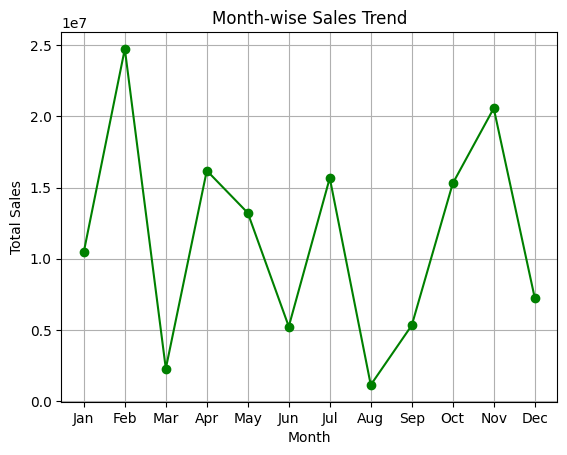

In [42]:
df=pd.read_csv("Amazon Sales data.csv")
df
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Extract month from 'date_column'
df['Order Date'] = df['Order Date'].dt.month

# Group by month and calculate total sales for each month
monthly_sales = df.groupby('Order Date')['Total Revenue'].sum()
#monthly_sales
#Plotting the monthly sales trend
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', color='green', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Month-wise Sales Trend')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])  # Customize x-axis ticks
plt.grid(True)  # Add gridlines for better readability
plt.show()

In [ ]:
# OBSERVATION:
# The lineplot shows the month-wise sales trend with February being the month with highest sales across the months.

### Yearly trend of sales 

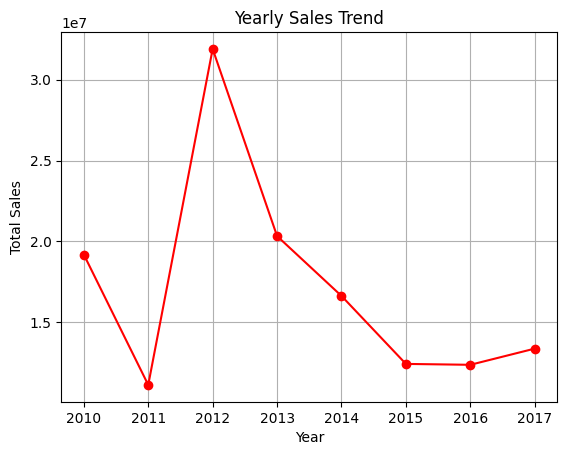

In [47]:
df=pd.read_csv("Amazon Sales data.csv")
df
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Extract year from 'date_column'
df['year'] = df['Order Date'].dt.year

# Group by year and calculate total sales for each year
yearly_sales = df.groupby('year')['Total Revenue'].sum()

# Plotting the yearly sales trend
plt.plot(yearly_sales.index, yearly_sales.values, marker='o', color='red', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Yearly Sales Trend')
plt.grid(True)  # Add gridlines for better readability
plt.show()

In [ ]:
# OBSERVATION:
# The line plot shows the yearly trend of sales with 2012 being the year with highest sales in total.

### Yearly monthwise sales trend

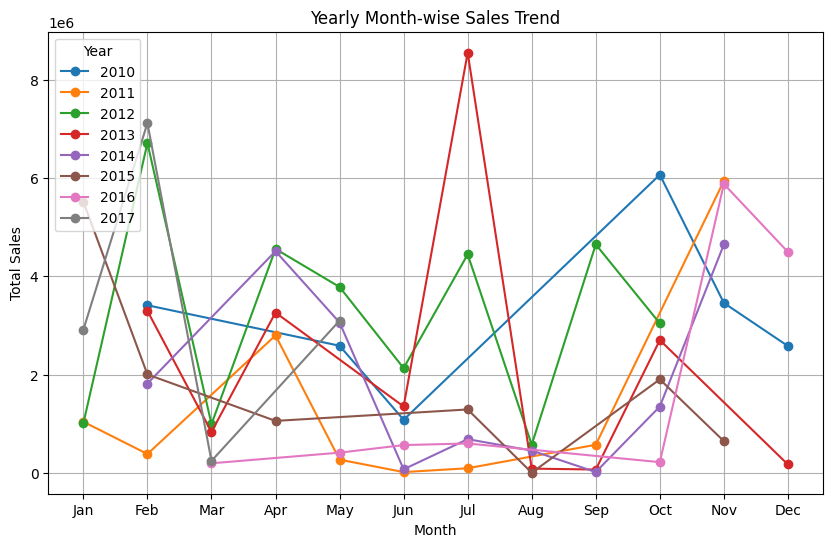

In [40]:
df=pd.read_csv("Amazon Sales data.csv")
df
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Extract year and month from 'date_column'
df['year'] = df['Order Date'].dt.year
df['month'] = df['Order Date'].dt.month

# Group by year and month, and calculate total sales for each year-month combination
yearly_monthly_sales = df.groupby(['year', 'month'])['Total Revenue'].sum()

# Plotting the yearly month-wise sales trend
fig, ax = plt.subplots(figsize=(10, 6))
for year in yearly_monthly_sales.index.levels[0]:
    monthly_sales = yearly_monthly_sales.loc[year]
    ax.plot(monthly_sales.index, monthly_sales.values, marker='o', label=year)

ax.set_xlabel('Month')
ax.set_ylabel('Total Sales')
ax.set_title('Yearly Month-wise Sales Trend')
ax.legend(title='Year', loc='upper left')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']) 
plt.grid(True)  # Add gridlines for better readability
plt.show()

In [ ]:
# OBSERVATION:
# This line plot shows the yearly month-wise sales trend with 2013 with juky month showing the best performance.

### Key metrics and relationships

In [41]:
df = pd.read_csv('Amazon Sales data.csv')

# Compute key metrics
total_sales = df['Total Revenue'].sum()
total_profit = df['Total Profit'].sum()
average_unit_price = df['Unit Price'].mean()
average_unit_cost = df['Unit Cost'].mean()
total_orders = df['Order ID'].nunique()
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df['Order Processing Time'] = (df['Ship Date'] - df['Order Date']).dt.days.mean()
average_profit_margin = (df['Total Profit'] / df['Total Revenue']).mean()

# Explore relationships
sales_by_region_country = df.groupby(['Region', 'Country'])['Total Revenue'].sum()
item_sales_channel = df.groupby(['Item Type', 'Sales Channel']).size()
order_priority_processing_time = df.groupby('Order Priority')['Order Processing Time'].mean()
revenue_cost_relationship = df[['Total Revenue', 'Total Cost']].corr()
unit_price_units_sold = df[['Unit Price', 'Units Sold']].corr()

# Print key metrics and relationships
print("Key Metrics:")
print("Total Sales:", total_sales)
print("Total Profit:", total_profit)
print("Average Unit Price:", average_unit_price)
print("Average Unit Cost:", average_unit_cost)
print("Total Orders:", total_orders)
print("Average Order Processing Time:", df['Order Processing Time'].mean())
print("Average Profit Margin:", average_profit_margin)

print("\nRelationships:")
print("Sales by Region and Country:")
print(sales_by_region_country)
print("\nItem Sales by Sales Channel:")
print(item_sales_channel)
print("\nOrder Priority and Order Processing Time:")
print(order_priority_processing_time)
print("\nCorrelation between Total Revenue and Total Cost:")
print(revenue_cost_relationship)
print("\nCorrelation between Unit Price and Units Sold:")
print(unit_price_units_sold)

Key Metrics:
Total Sales: 137348768.31
Total Profit: 44168198.39999999
Average Unit Price: 276.7613
Average Unit Cost: 191.048
Total Orders: 100
Average Order Processing Time: 23.36000000000001
Average Profit Margin: 0.3621162285657073

Relationships:
Sales by Region and Country:
Region              Country     
Asia                Bangladesh       902980.64
                    Brunei          4368316.68
                    Kyrgyzstan        19103.44
                    Laos             574951.92
                    Malaysia          58471.11
                                       ...    
Sub-Saharan Africa  Senegal         1356180.10
                    Sierra Leone    3097359.15
                    South Sudan      173676.25
                    The Gambia      5449517.95
                    Zambia           623289.30
Name: Total Revenue, Length: 76, dtype: float64

Item Sales by Sales Channel:
Item Type        Sales Channel
Baby Food        Offline          3
                 Online 

### Visualization of sales by region and country 

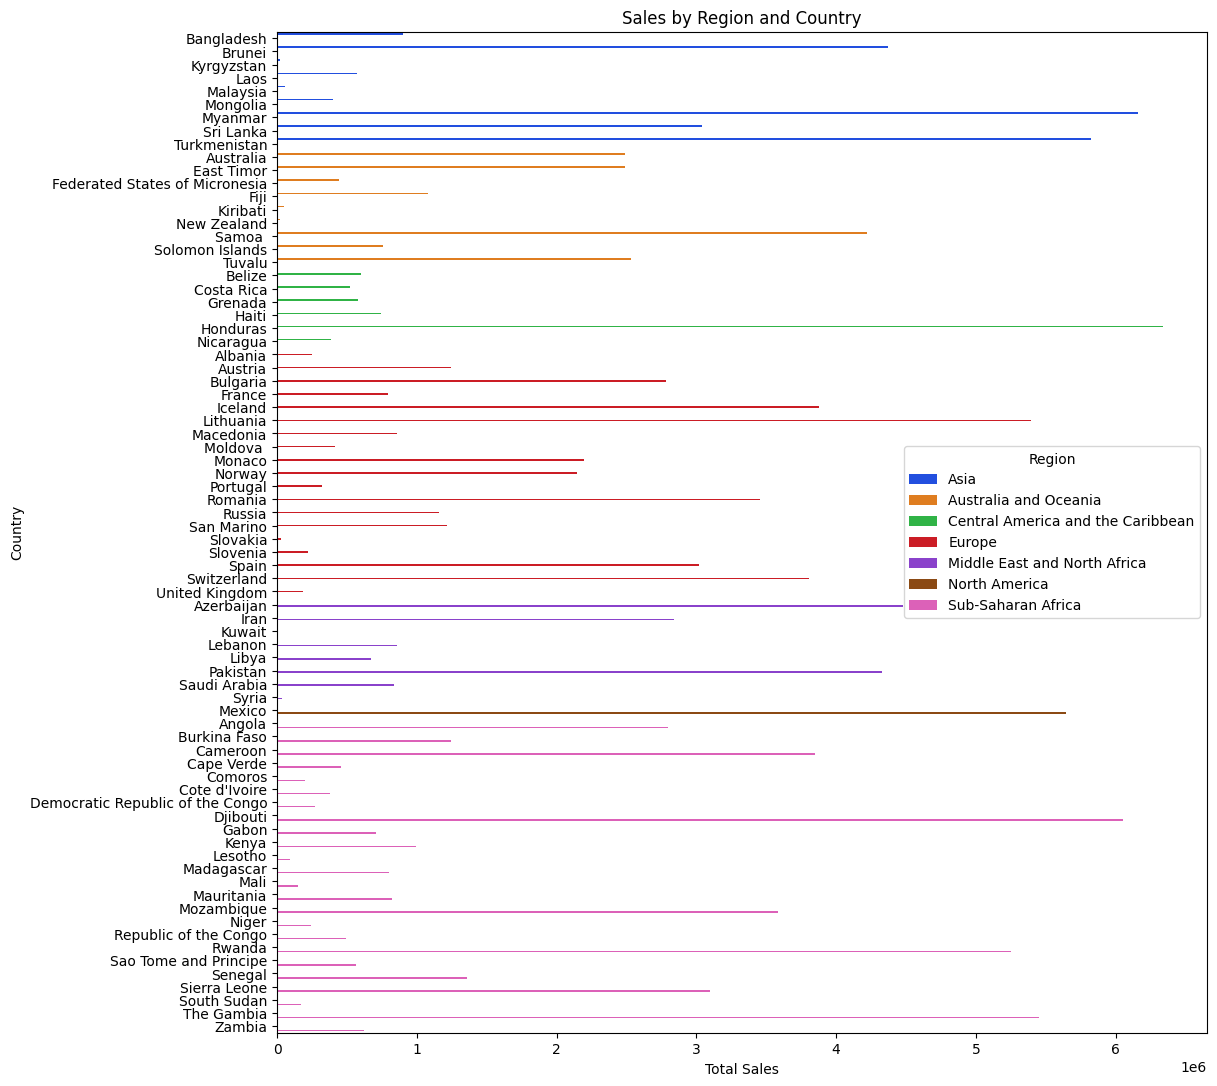

In [69]:
df = pd.read_csv('Amazon Sales data.csv')

# Group by region and country and calculate total sales
sales_by_region_country = df.groupby(['Region', 'Country'])['Total Revenue'].sum().reset_index()

# Plotting sales by region and country using seaborn
plt.figure(figsize=(12, 13))
sns.barplot(x='Total Revenue', y='Country', hue='Region', data=sales_by_region_country, palette='bright')
plt.xlabel('Total Sales')
plt.ylabel('Country')
plt.title('Sales by Region and Country')
plt.legend(title='Region')
plt.show()

### Visualization of total sales by sales channel 

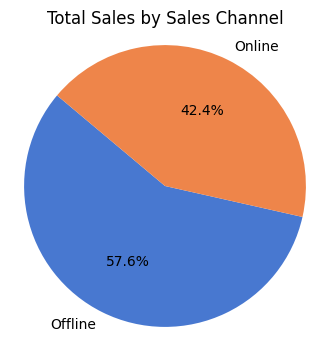

In [75]:
df = pd.read_csv('Amazon Sales data.csv')

# Group by sales channel and calculate total sales
sales_by_channel = df.groupby('Sales Channel')['Total Revenue'].sum().reset_index()

# Plotting total sales by sales channel as a pie chart
plt.figure(figsize=(4, 4))
plt.pie(sales_by_channel['Total Revenue'], labels=sales_by_channel['Sales Channel'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('muted'))
plt.title('Total Sales by Sales Channel')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

### Visualization of total sales and total profit by item type

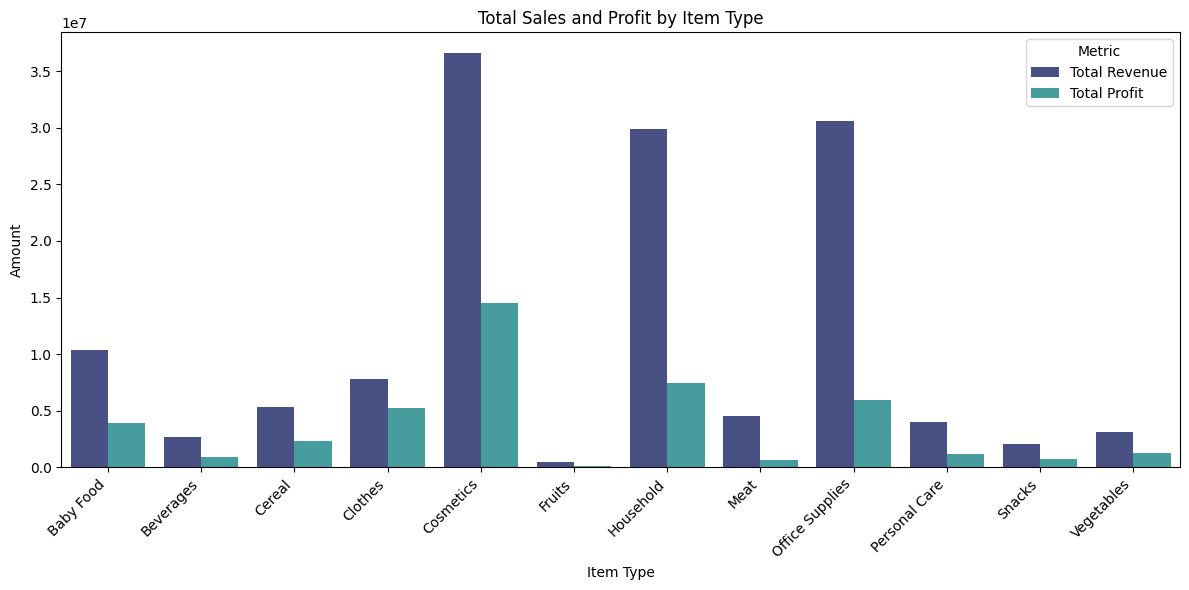

In [63]:
df = pd.read_csv('Amazon Sales data.csv')

# Group by item type and calculate total sales and profit
sales_profit_by_item_type = df.groupby('Item Type')[['Total Revenue', 'Total Profit']].sum().reset_index()

# Melt the DataFrame to make it suitable for plotting
sales_profit_melted = pd.melt(sales_profit_by_item_type, id_vars=['Item Type'], var_name='Metric', value_name='Value')

# Plotting total sales and profit by item type using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='Item Type', y='Value', hue='Metric', data=sales_profit_melted, palette='mako')
plt.xlabel('Item Type')
plt.ylabel('Amount')
plt.title('Total Sales and Profit by Item Type')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

### Visualization of units sold by item type

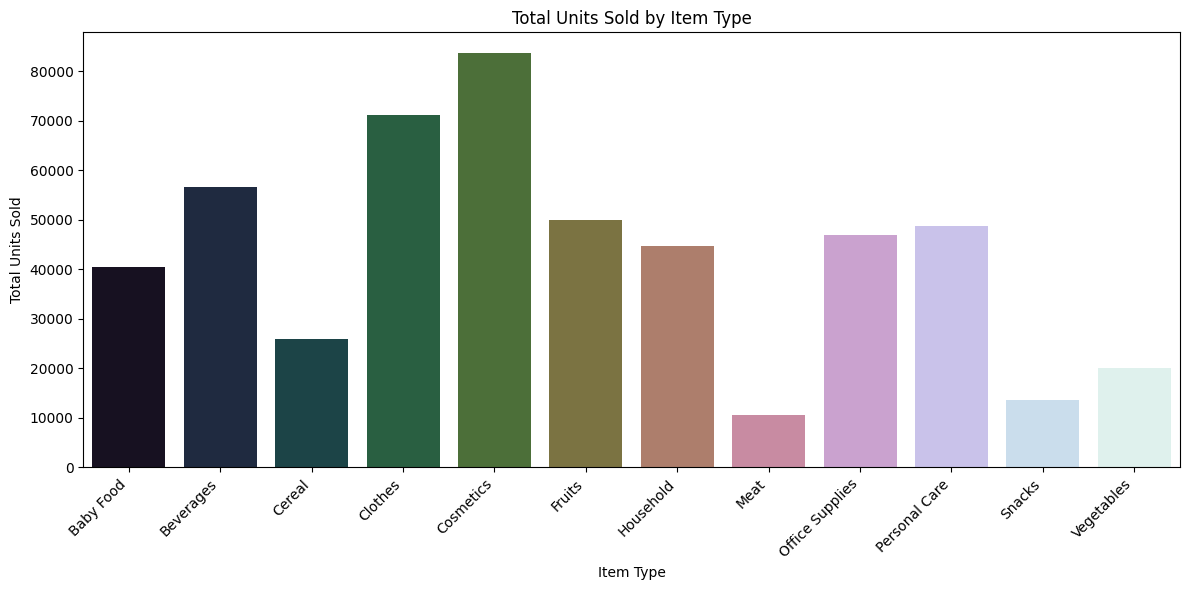

In [85]:
df = pd.read_csv('Amazon Sales data.csv')

# Group by item type and calculate total units sold
units_sold_by_item_type = df.groupby('Item Type')['Units Sold'].sum().reset_index()

# Plotting units sold by item type using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='Item Type', y='Units Sold', data=units_sold_by_item_type, palette='cubehelix')
plt.xlabel('Item Type')
plt.ylabel('Total Units Sold')
plt.title('Total Units Sold by Item Type')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()